In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from skimage import data
from skimage.exposure import histogram
from skimage.color import rgb2gray
from skimage import morphology

image = Image.open('Examples/Device2_Area1_During30kcaseinandADAMTS13flow.jpg')
img_array = np.array(image)
image_gray = rgb2gray(img_array)
hist, hist_centers = histogram(image_gray)

plt.rcParams.update({'font.size': 100})
fig, axes = plt.subplots(2, 1, figsize=(80, 160))
axes[0].imshow(image_gray, cmap=plt.cm.gray)
#axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)

In [3]:
from skimage.filters import sobel
from skimage.color import label2rgb
from scipy import ndimage
import collections

elevation_map = sobel(image_gray)

markers = np.zeros_like(image_gray)
markers[image_gray < .4] = 1                                   #set the threshold as 0.5 in grayscale
markers[image_gray > .4] = 2

segmentation = morphology.watershed(elevation_map, markers)
segmentation = ndimage.binary_fill_holes(segmentation - 1)
labeled_image_gray, _ = ndimage.label(segmentation)

a = collections.Counter(labeled_image_gray.reshape(-1))
b=collections.Counter(el for el in a.elements() if a[el] >=5)   #set the threshold as 5 pixels

sorted_val=[]
for key,val in b.items():
    sorted_val.append(key)
sorted_val=sorted_val[1:]                                       #get rid of sorted_val[0]=0
print(sorted_val)

[29, 36, 39, 147, 186, 213, 215, 280, 330, 331, 335, 340, 367, 391, 413, 417, 422, 432, 442, 474, 483, 515, 525, 532, 533, 547, 553, 554, 557, 578, 590, 591, 598, 600, 622, 631, 636, 637, 641, 647, 705, 713, 741, 742, 753, 767, 793, 816, 844, 846, 898, 906, 918, 927, 931, 934, 947, 959, 995, 1014, 1017, 1025, 1052, 1074, 1093, 1096, 1115, 1116, 1119, 1121, 1127, 1130, 1149, 1160, 1166, 1167, 1172, 1176, 1208, 1275, 1295, 1298, 1309, 1335, 1342, 1362, 1365, 1389, 1398, 1419, 1429, 1437, 1451, 1455, 1457, 1470, 1481, 1484, 1485, 1530, 1554, 1575, 1584, 1598, 1608, 1609, 1611, 1621, 1626, 1633, 1642, 1645, 1659, 1663, 1679, 1689, 1691, 1706, 1707, 1711, 1730, 1747, 1762, 1772, 1780, 1789, 1807, 1817, 1823, 1825, 1842, 1858, 1892, 1902, 1935, 1939, 1942, 2054, 2097, 2099, 2102, 2116, 2129, 2131, 2145, 2222, 2263, 2283, 2301, 2304, 2349, 2365, 2373, 2378, 2382, 2411, 2419, 2459, 2520, 2529, 2538, 2559, 2581, 2604, 2641, 2650, 2686, 2703, 2745, 2785, 2833, 2852, 2857, 2863, 2894, 2939, 2970,

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


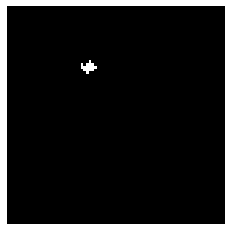

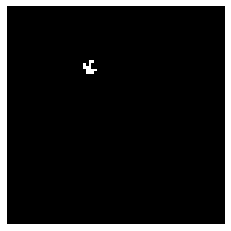

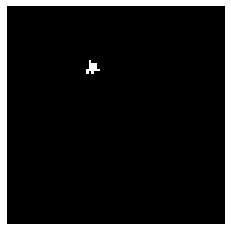

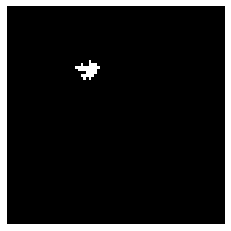

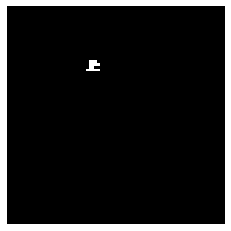

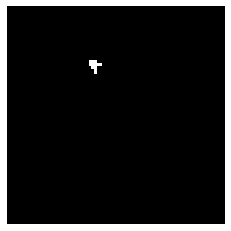

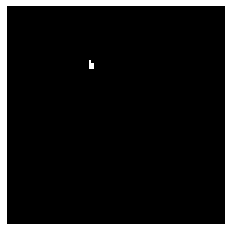

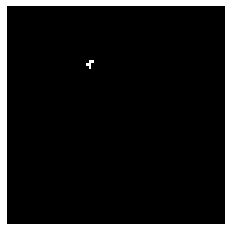

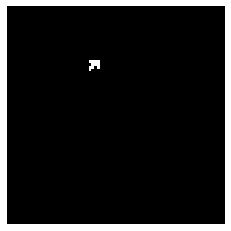

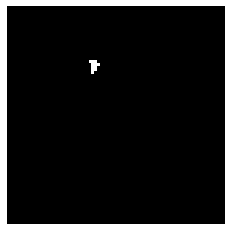

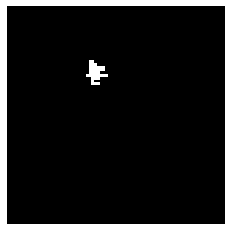

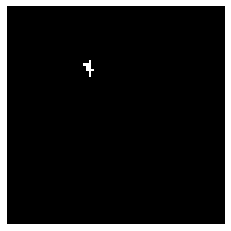

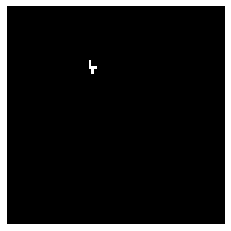

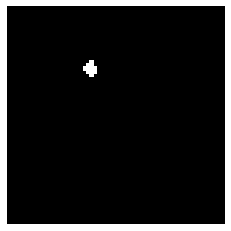

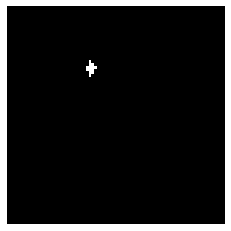

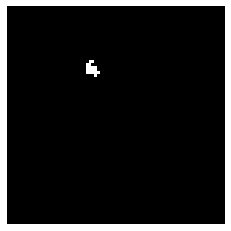

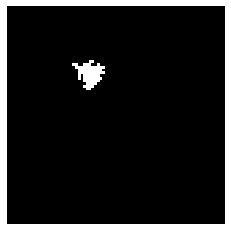

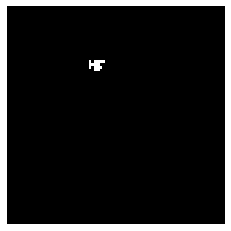

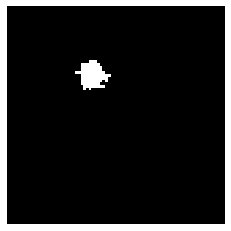

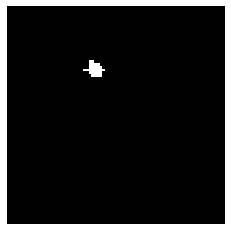

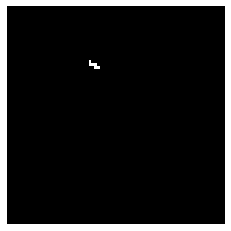

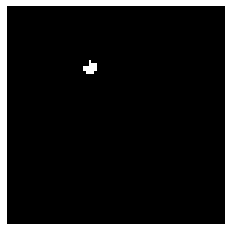

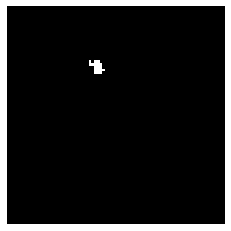

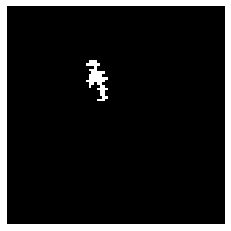

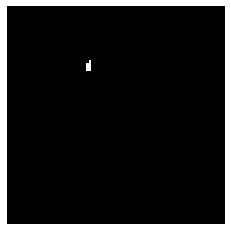

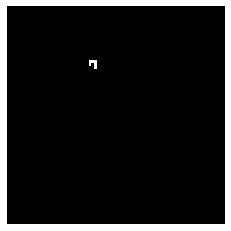

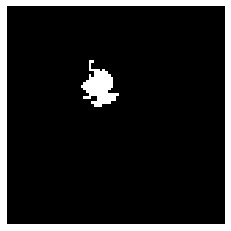

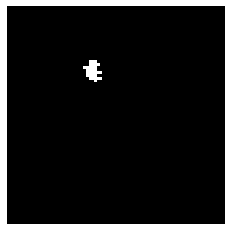

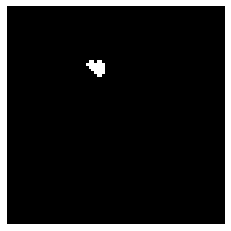

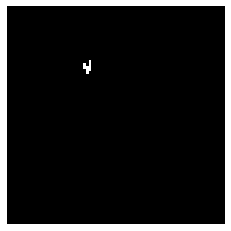

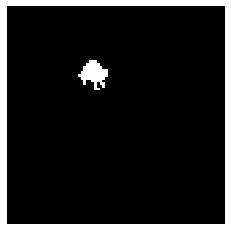

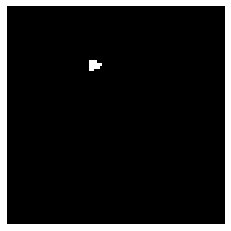

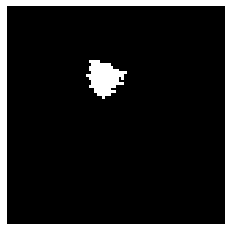

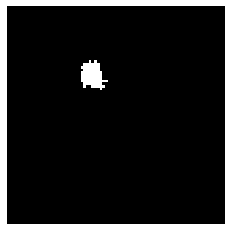

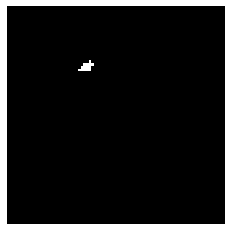

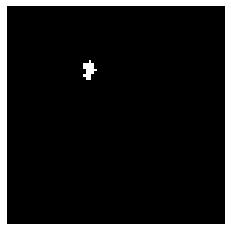

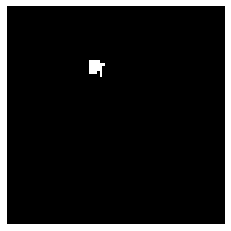

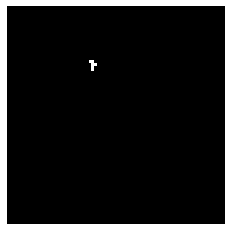

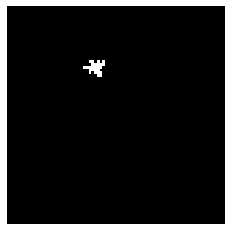

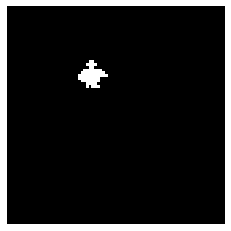

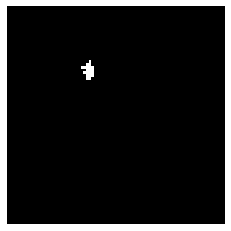

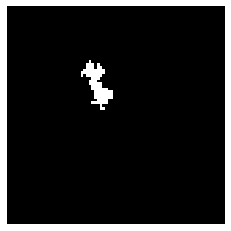

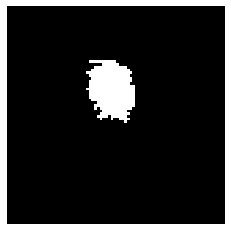

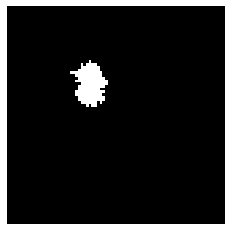

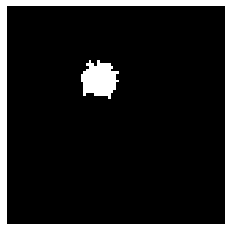

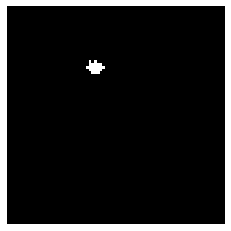

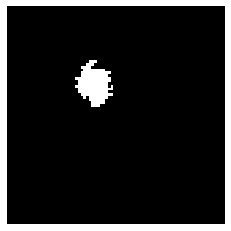

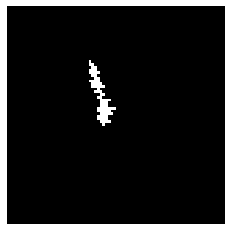

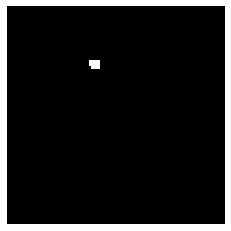

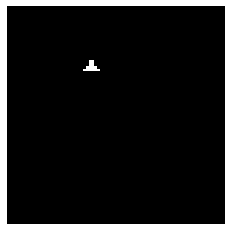

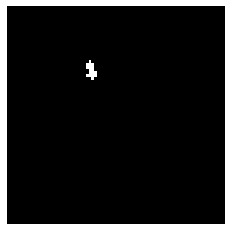

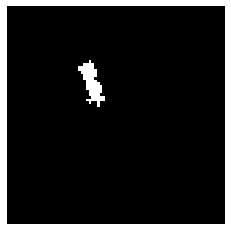

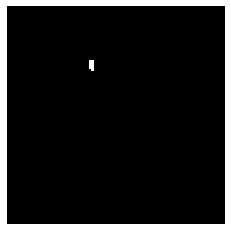

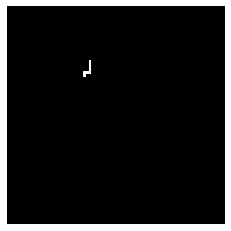

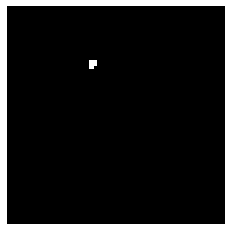

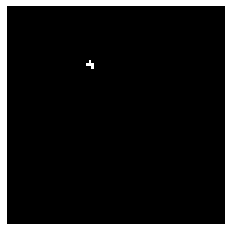

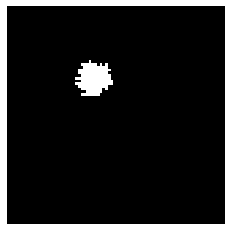

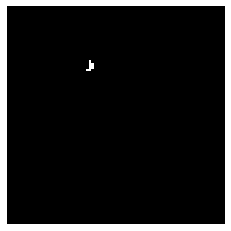

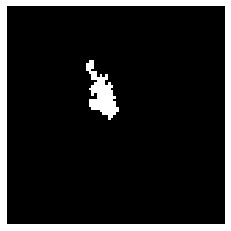

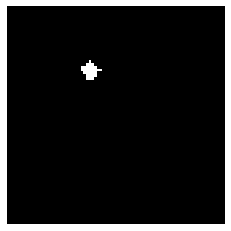

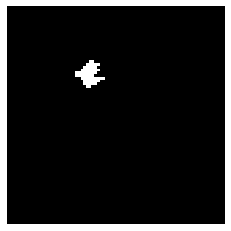

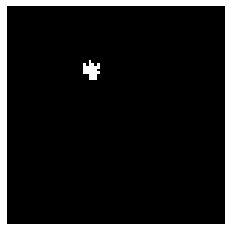

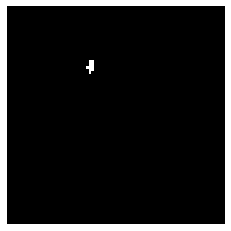

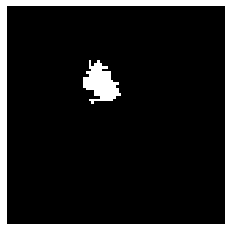

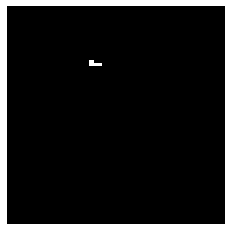

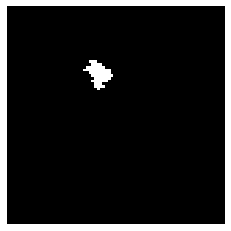

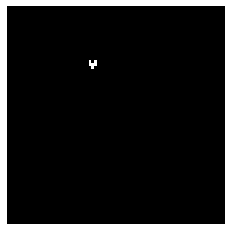

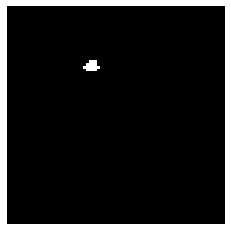

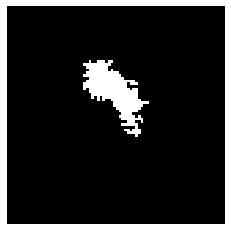

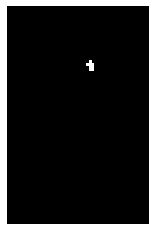

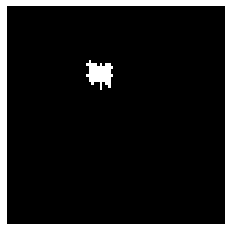

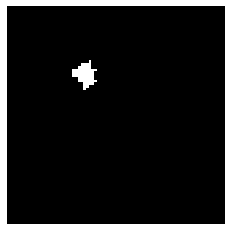

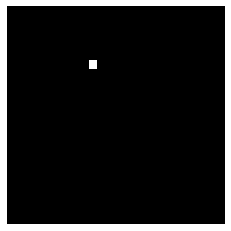

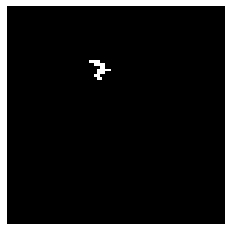

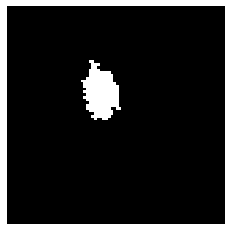

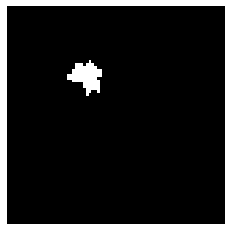

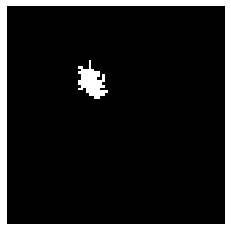

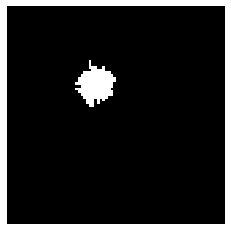

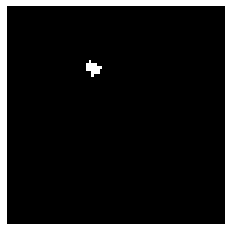

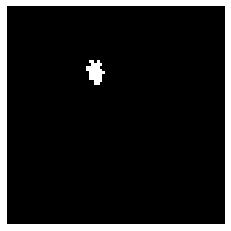

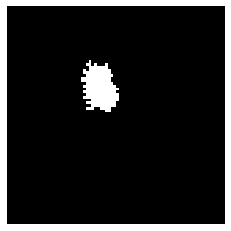

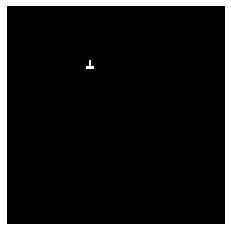

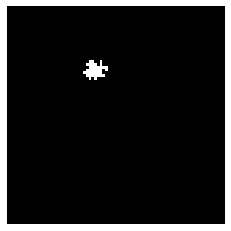

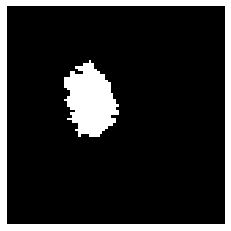

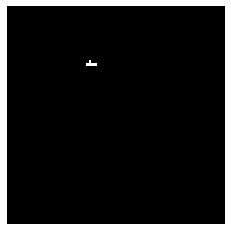

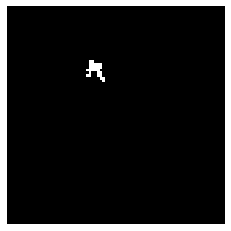

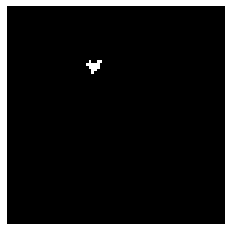

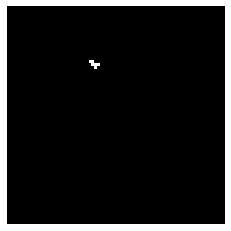

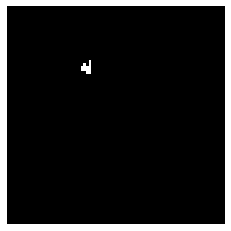

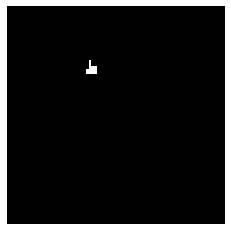

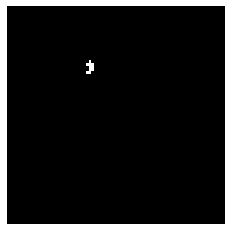

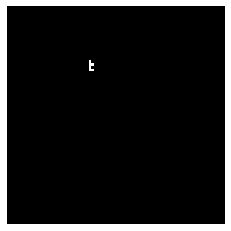

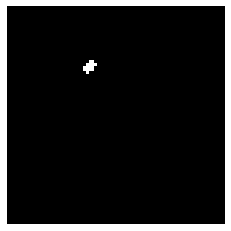

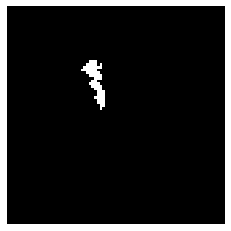

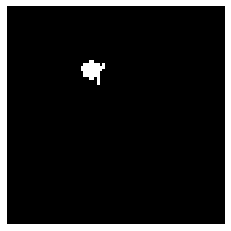

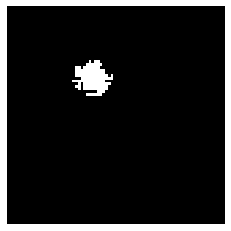

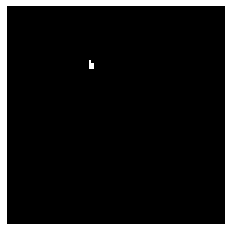

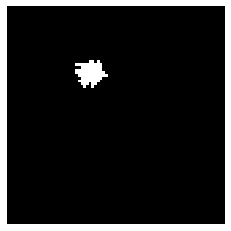

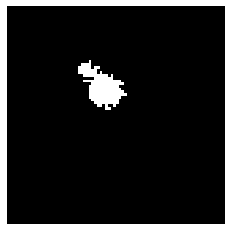

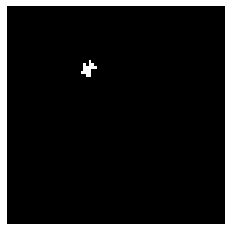

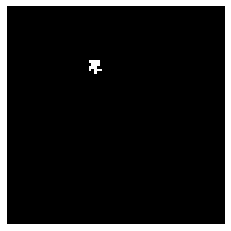

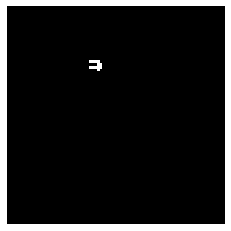

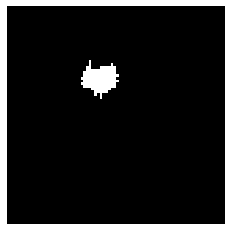

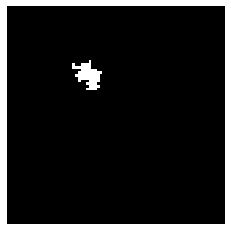

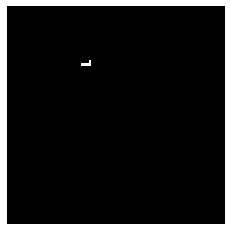

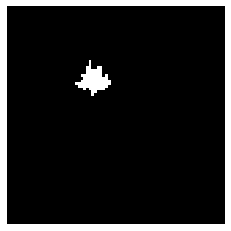

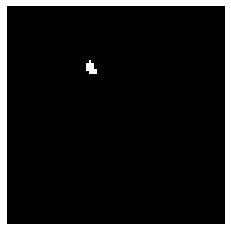

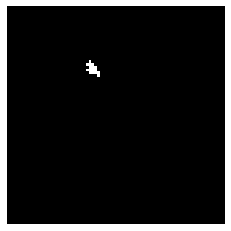

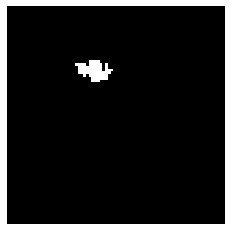

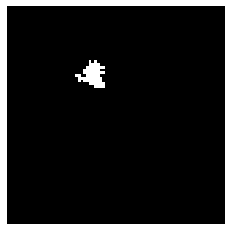

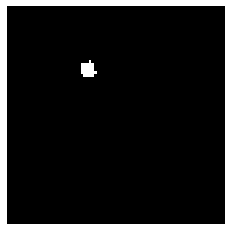

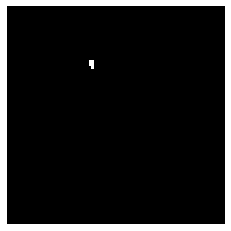

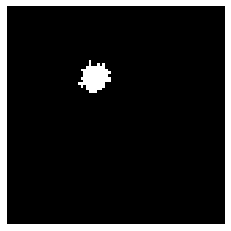

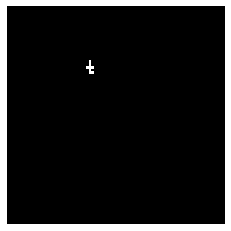

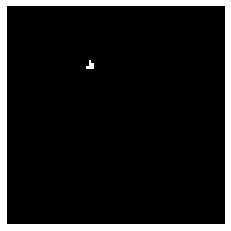

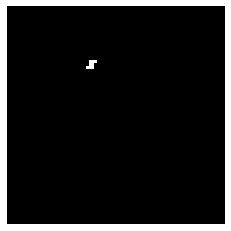

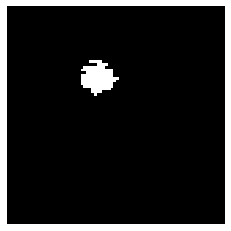

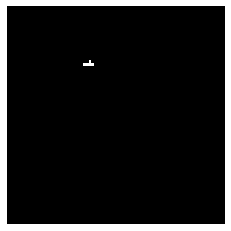

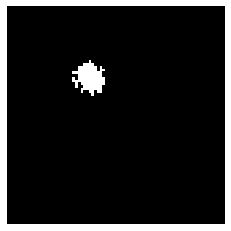

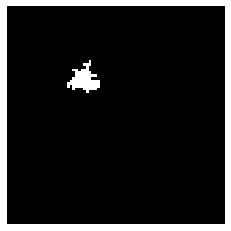

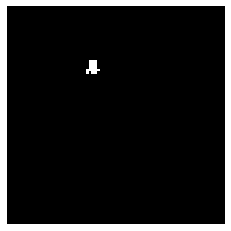

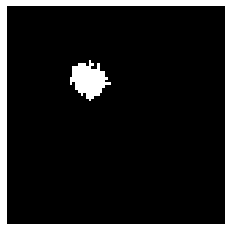

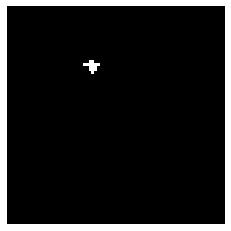

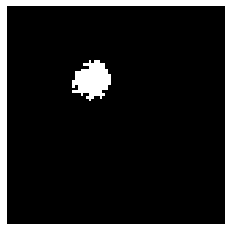

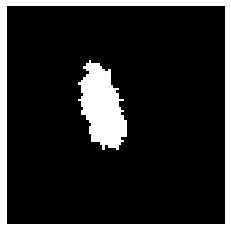

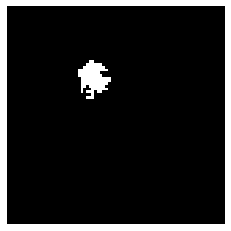

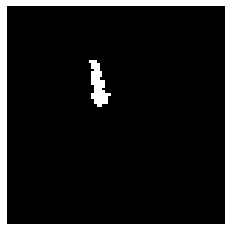

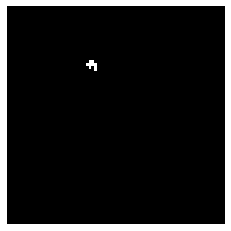

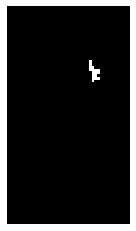

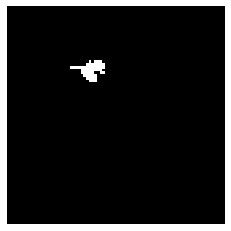

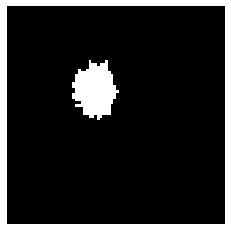

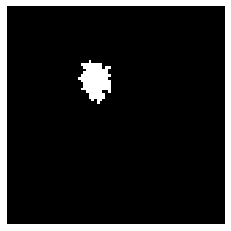

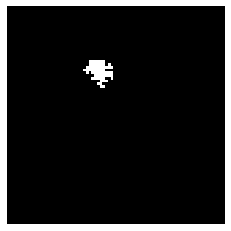

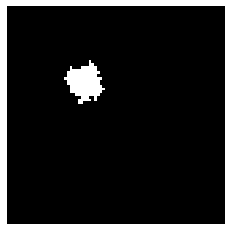

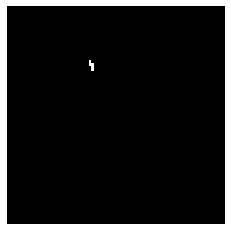

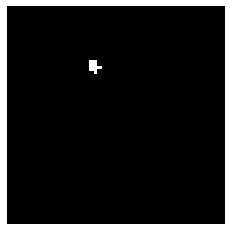

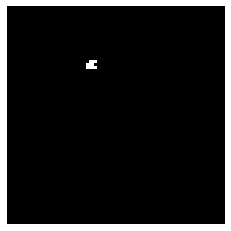

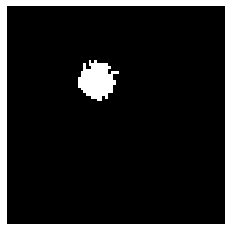

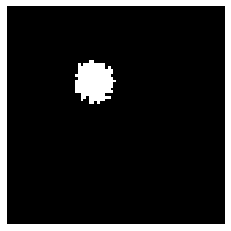

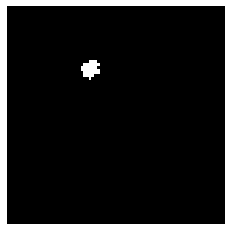

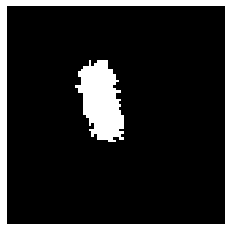

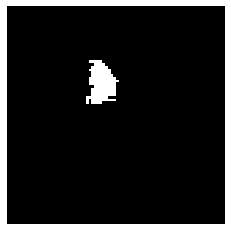

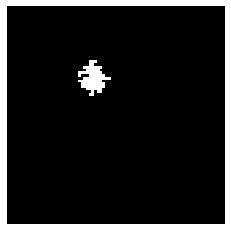

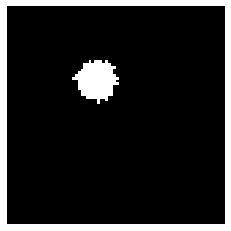

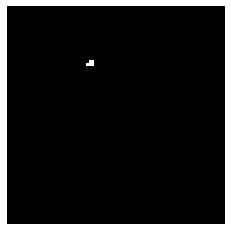

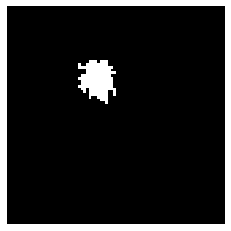

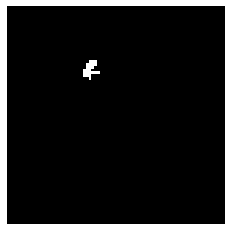

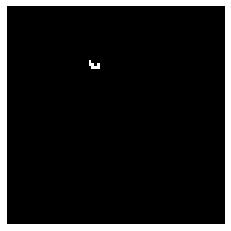

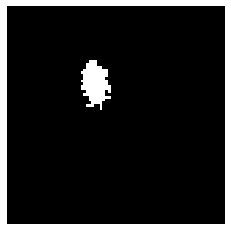

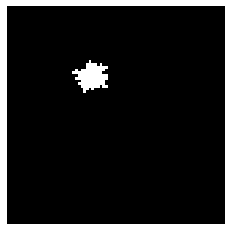

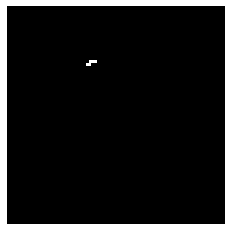

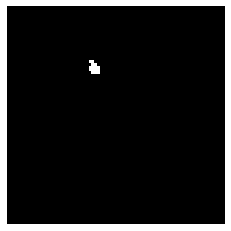

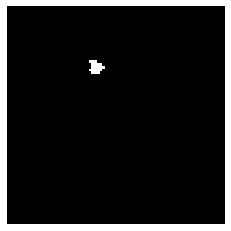

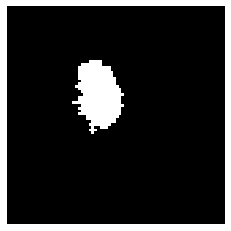

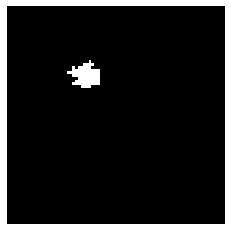

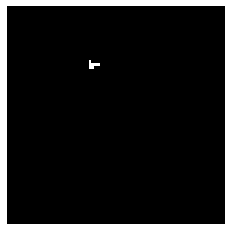

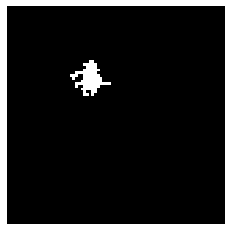

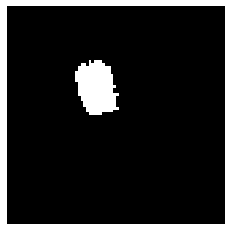

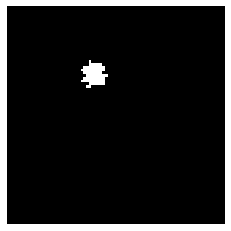

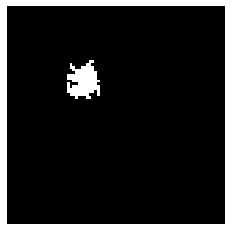

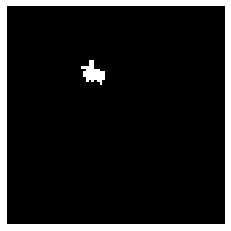

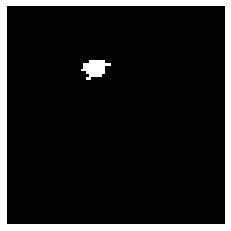

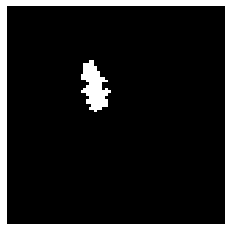

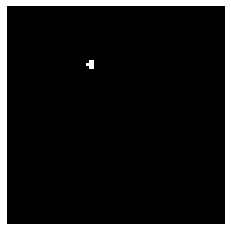

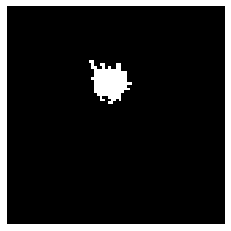

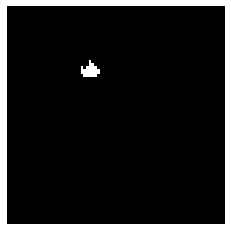

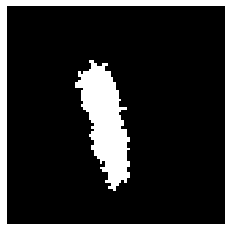

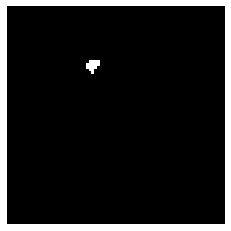

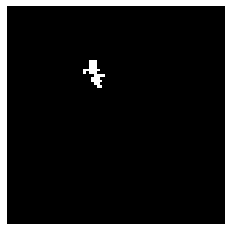

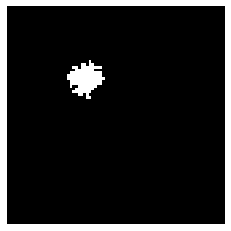

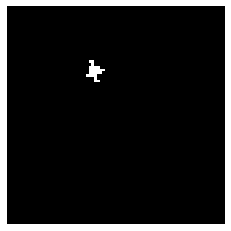

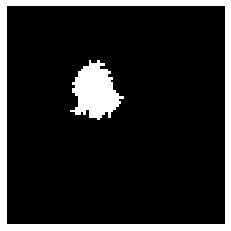

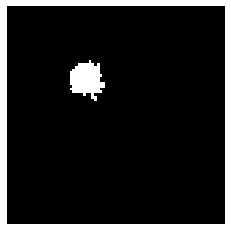

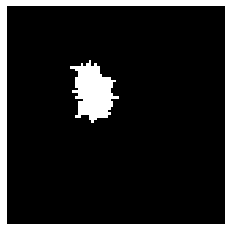

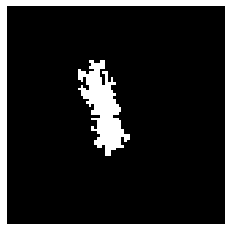

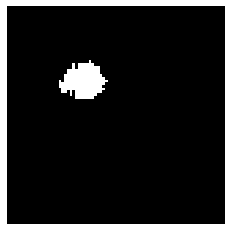

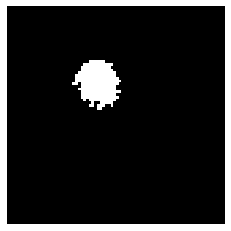

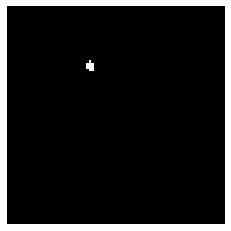

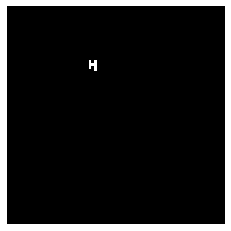

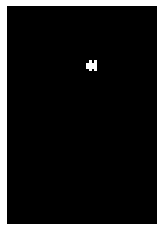

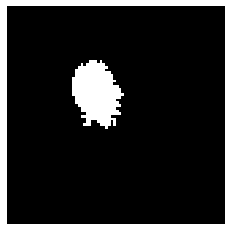

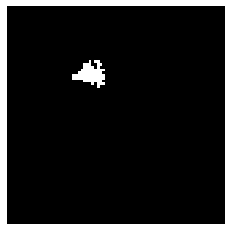

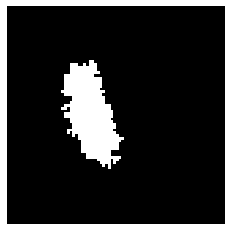

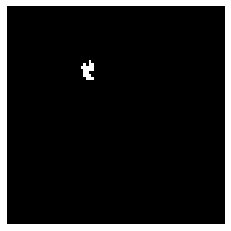

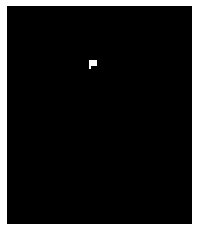

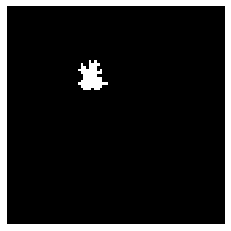

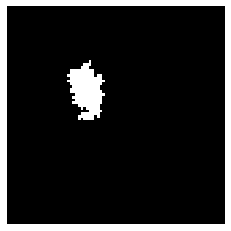

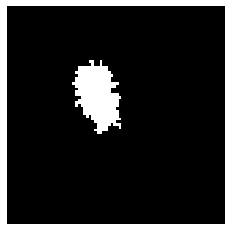

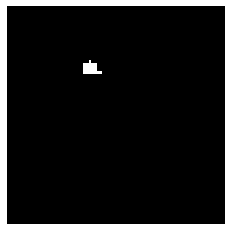

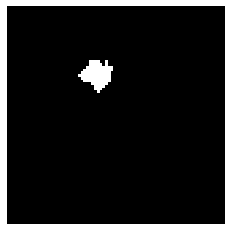

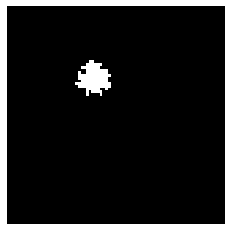

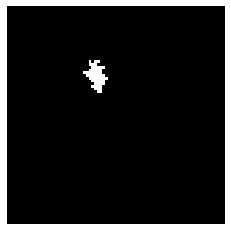

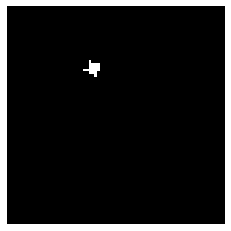

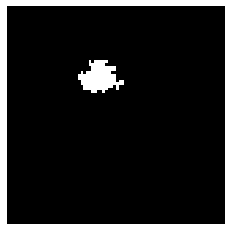

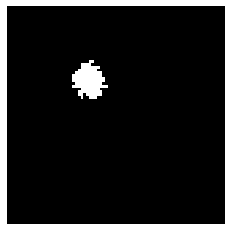

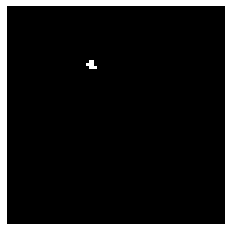

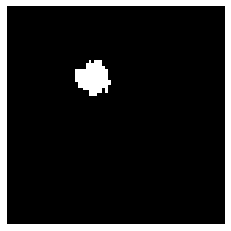

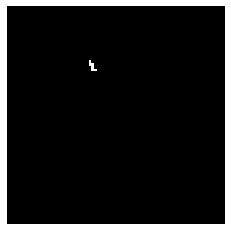

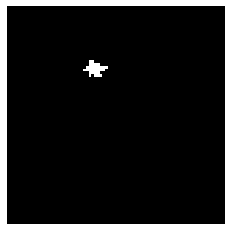

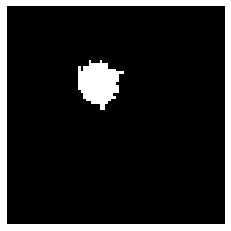

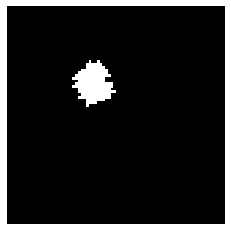

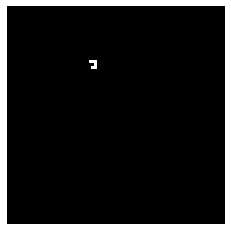

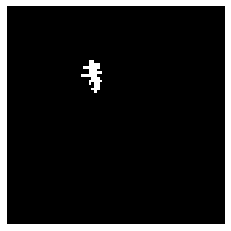

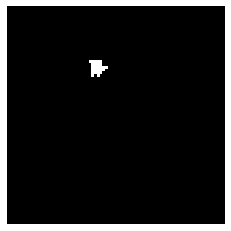

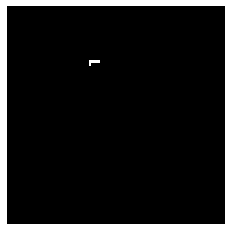

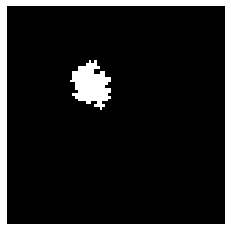

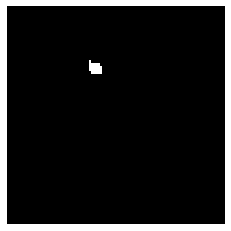

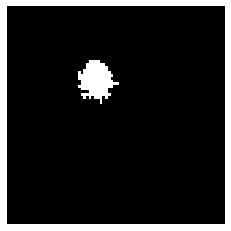

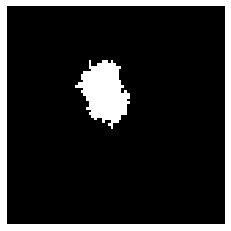

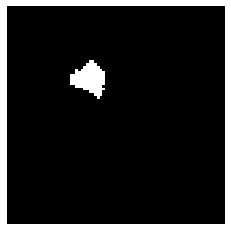

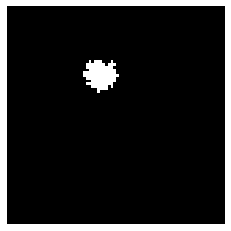

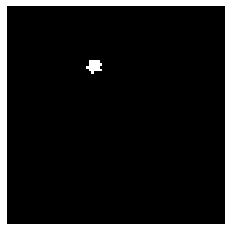

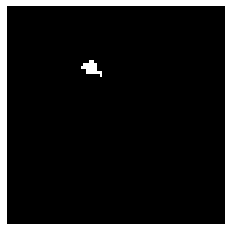

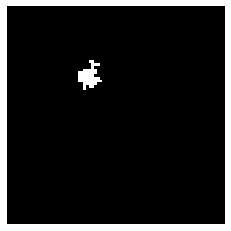

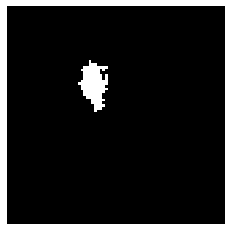

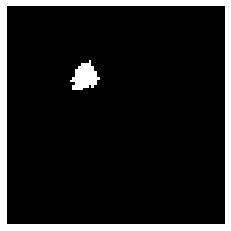

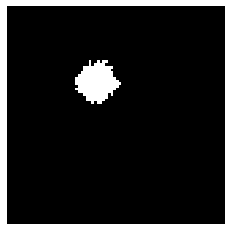

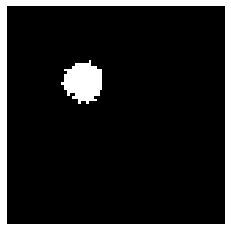

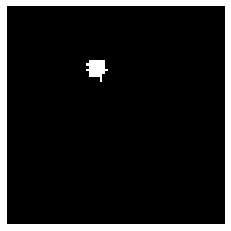

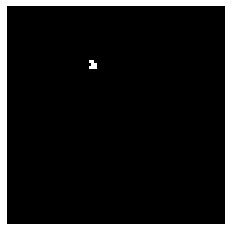

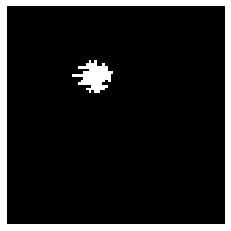

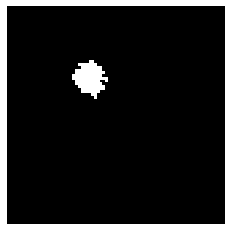

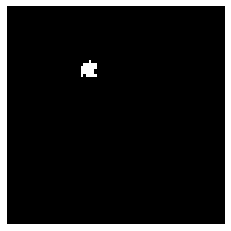

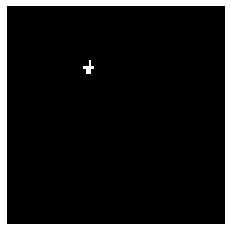

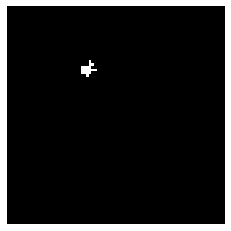

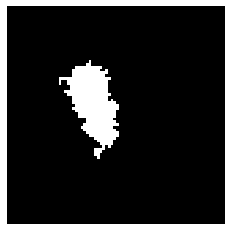

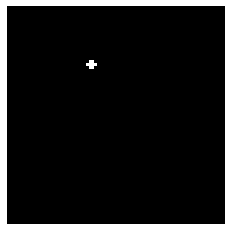

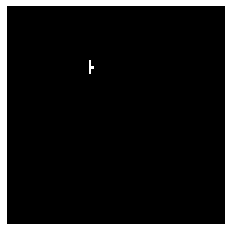

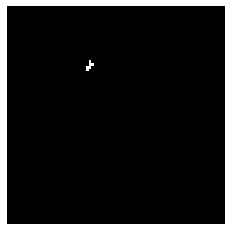

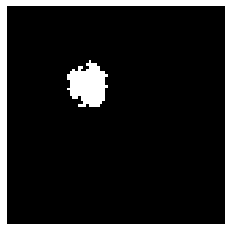

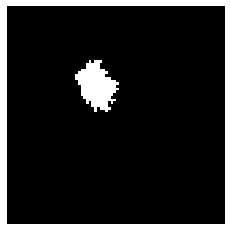

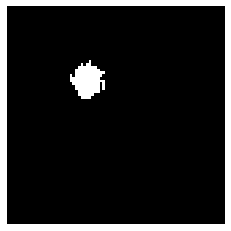

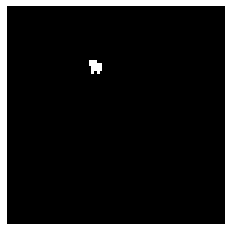

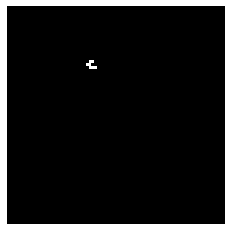

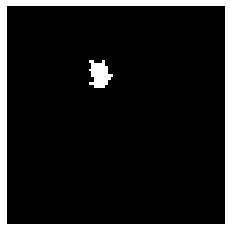

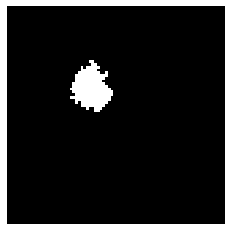

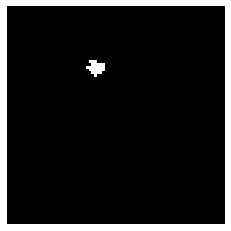

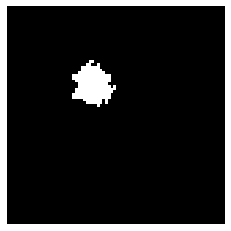

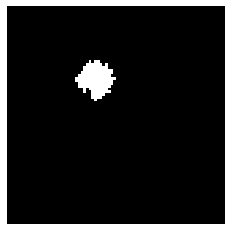

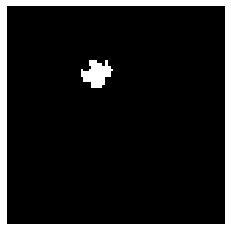

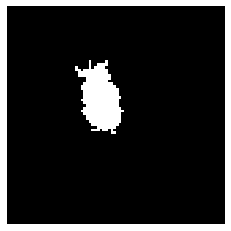

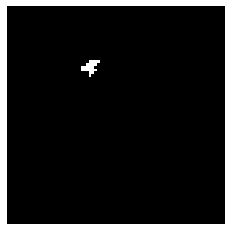

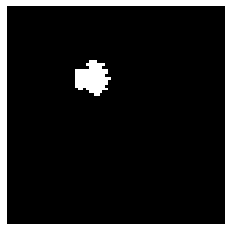

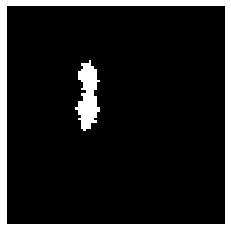

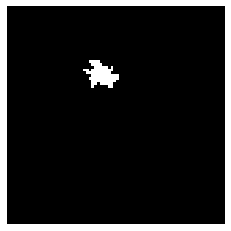

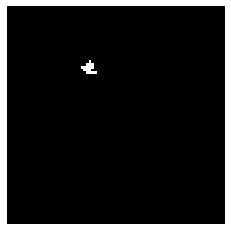

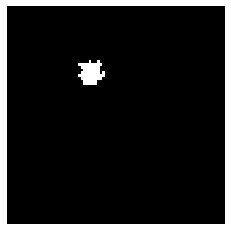

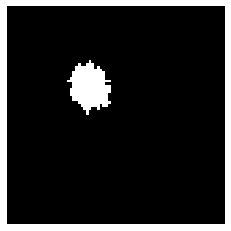

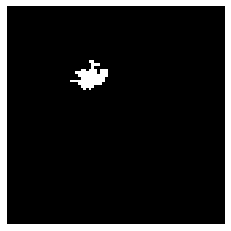

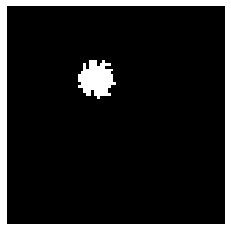

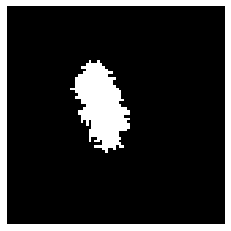

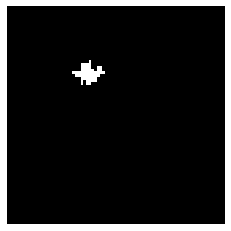

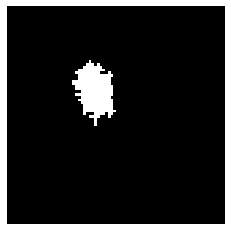

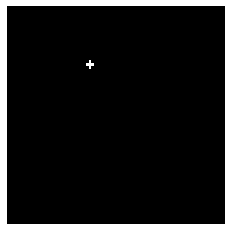

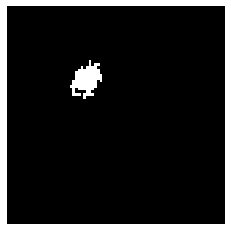

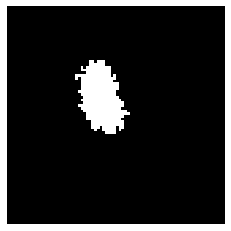

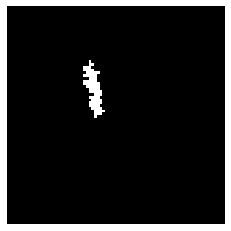

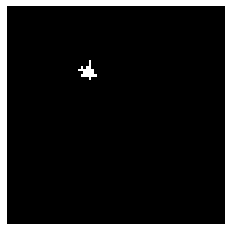

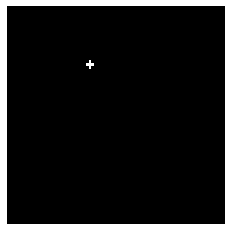

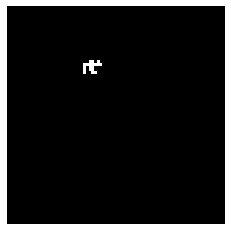

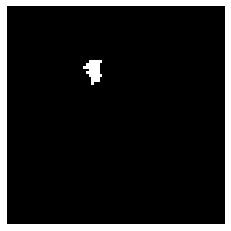

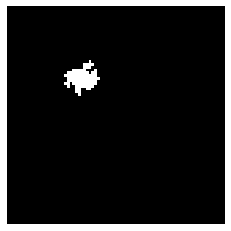

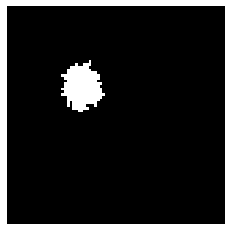

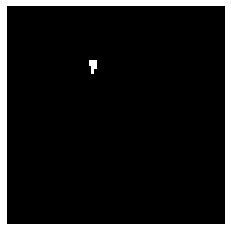

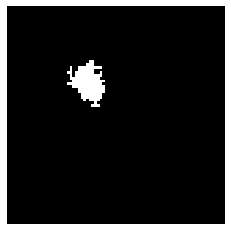

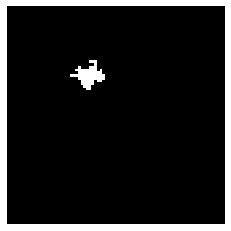

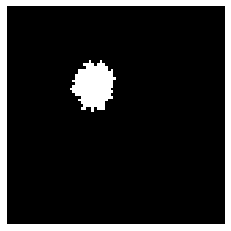

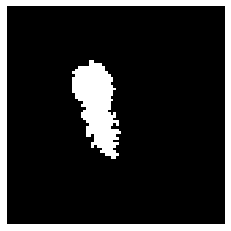

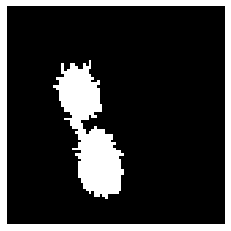

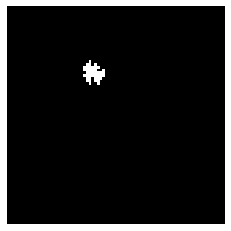

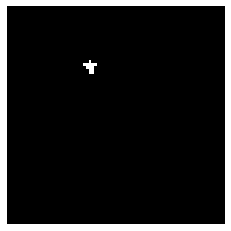

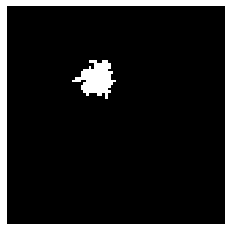

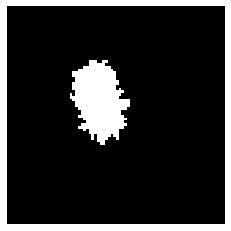

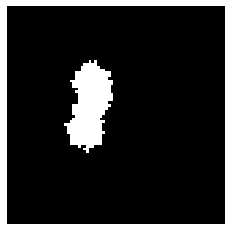

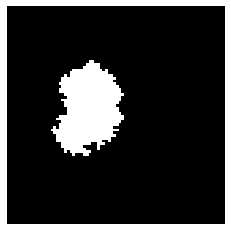

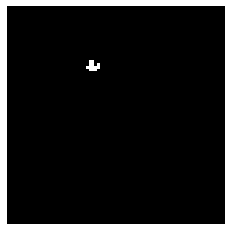

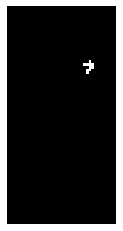

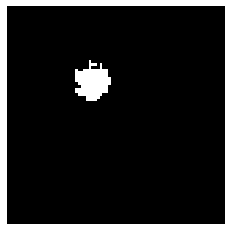

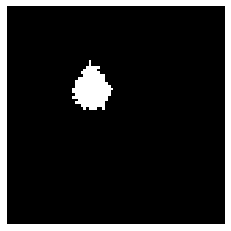

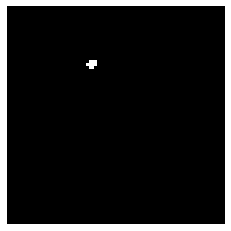

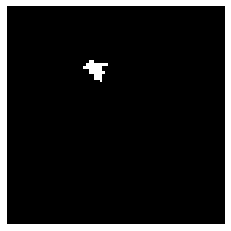

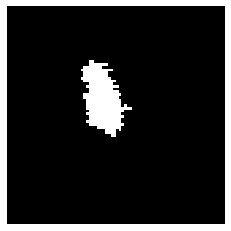

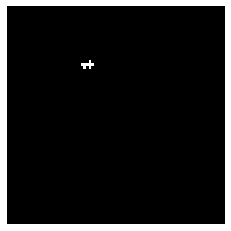

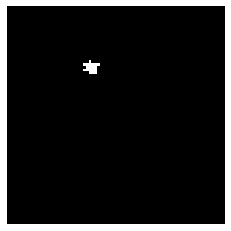

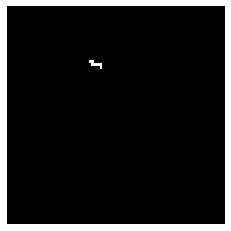

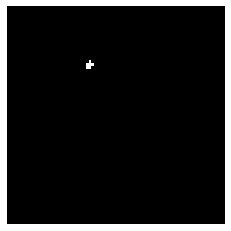

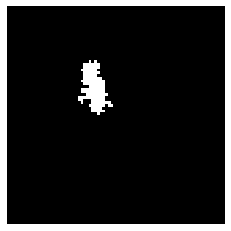

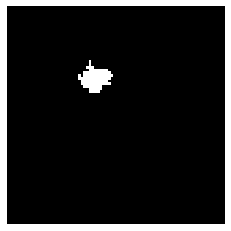

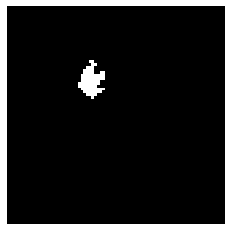

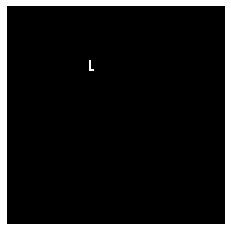

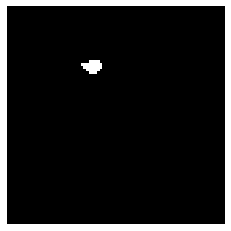

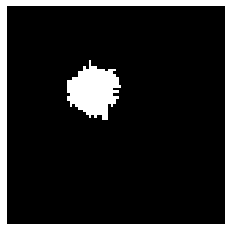

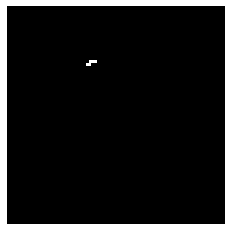

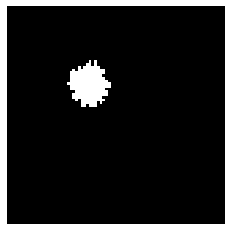

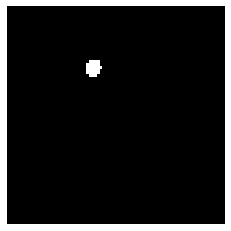

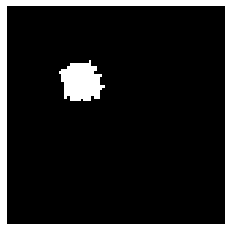

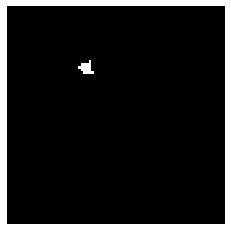

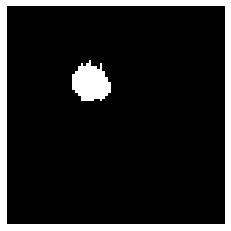

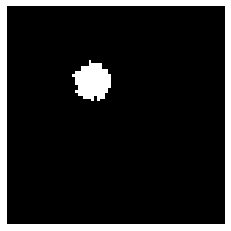

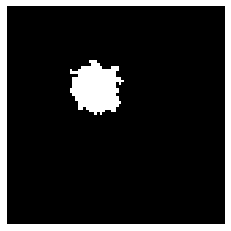

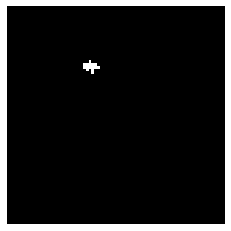

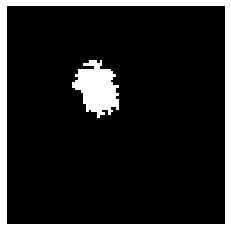

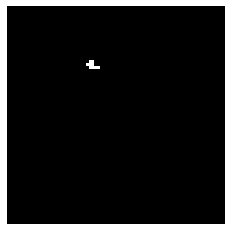

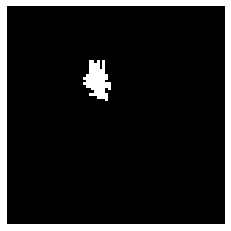

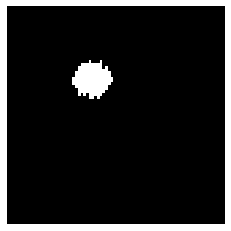

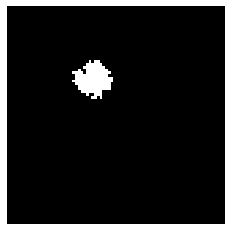

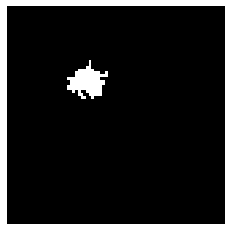

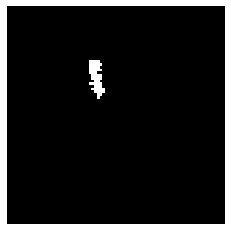

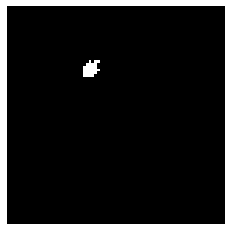

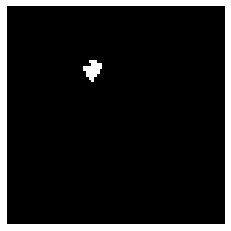

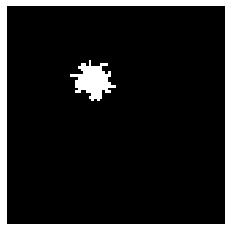

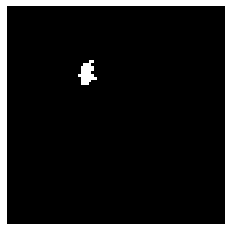

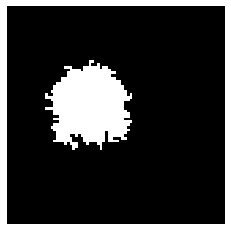

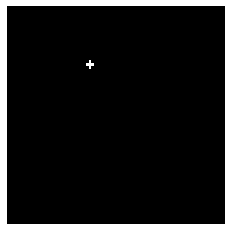

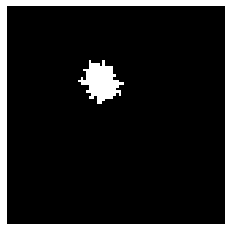

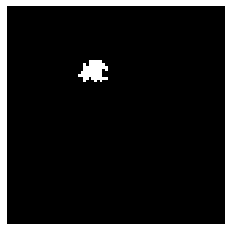

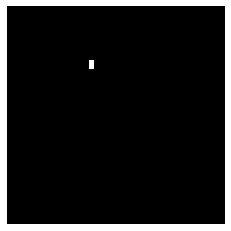

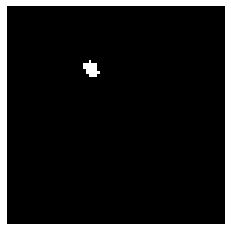

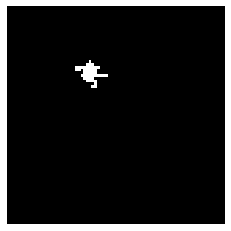

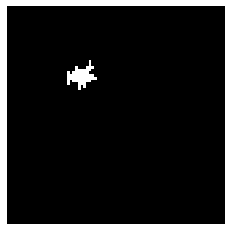

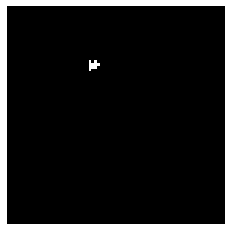

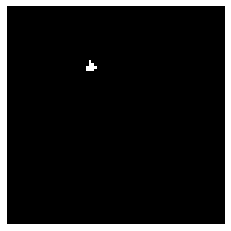

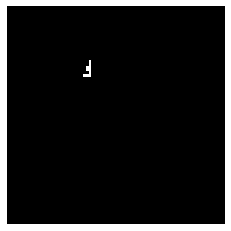

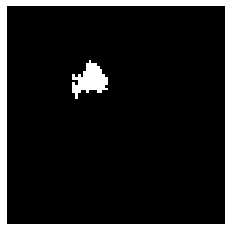

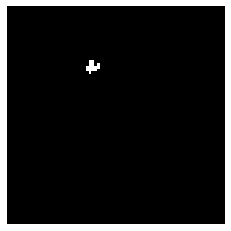

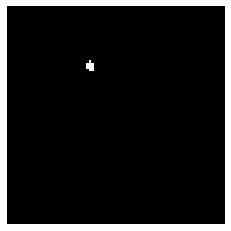

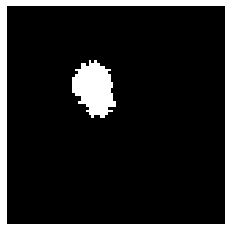

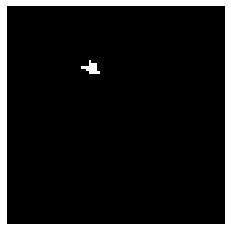

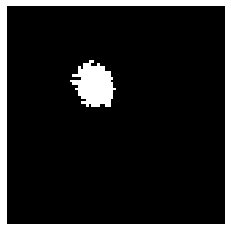

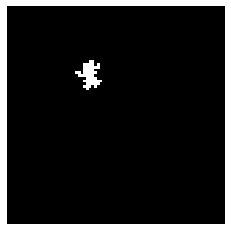

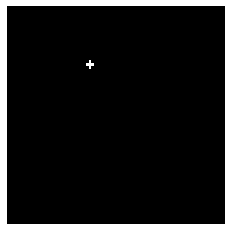

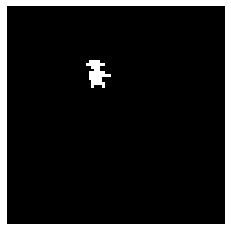

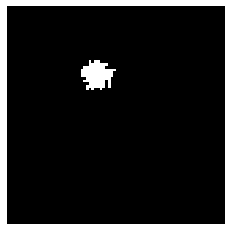

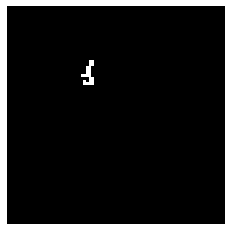

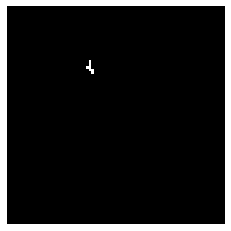

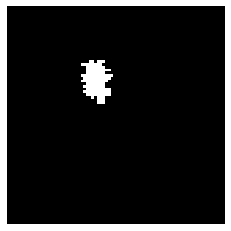

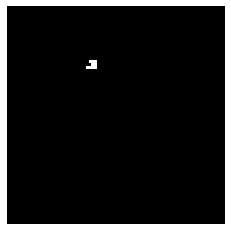

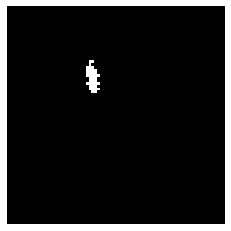

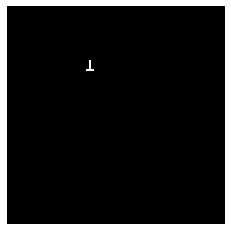

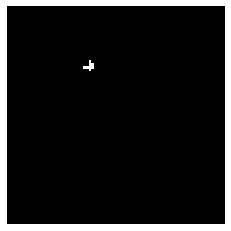

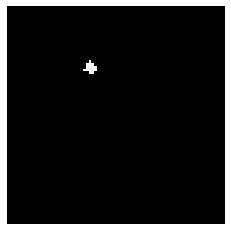

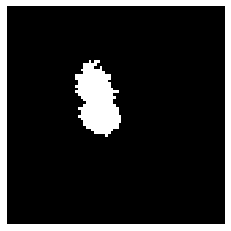

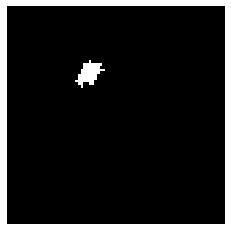

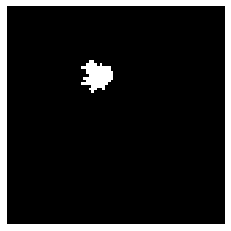

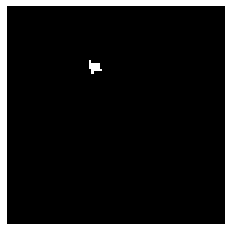

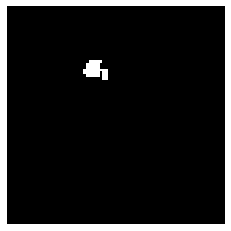

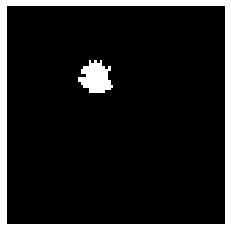

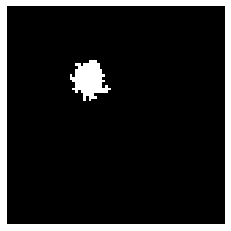

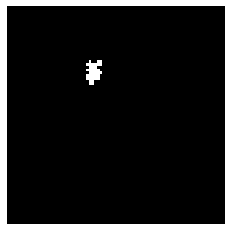

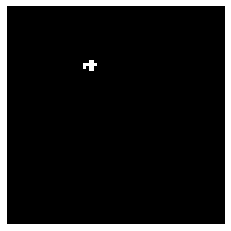

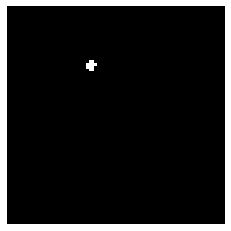

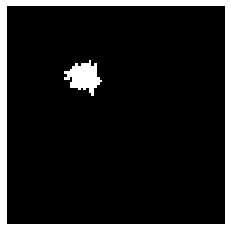

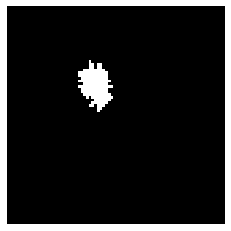

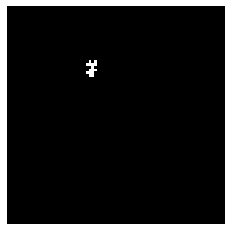

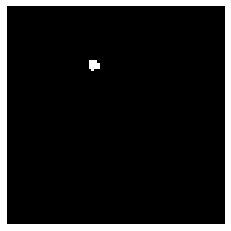

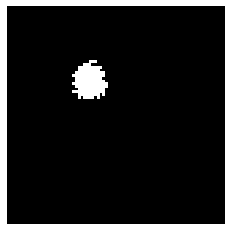

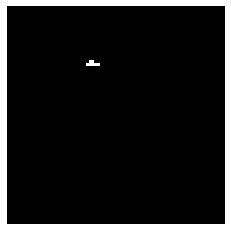

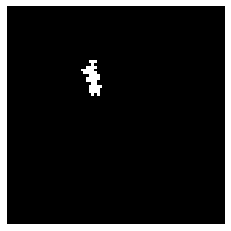

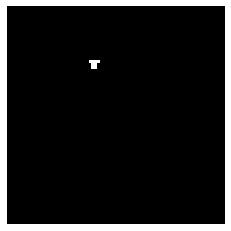

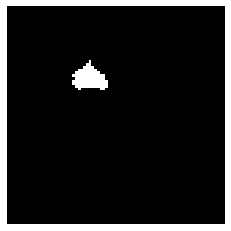

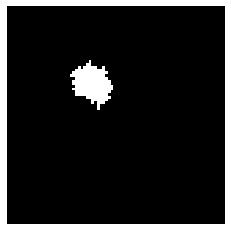

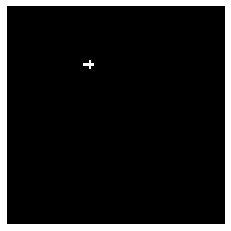

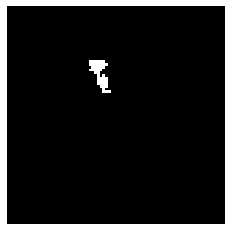

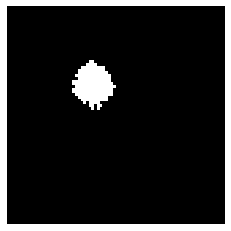

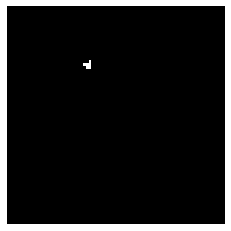

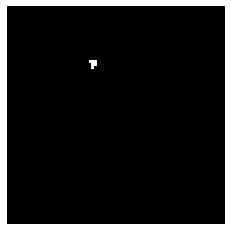

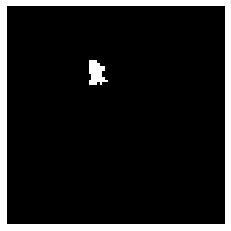

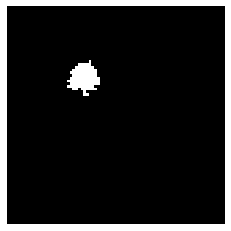

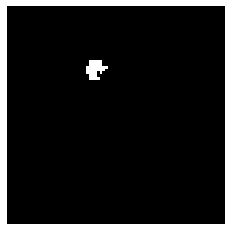

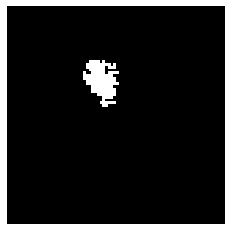

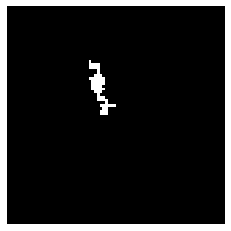

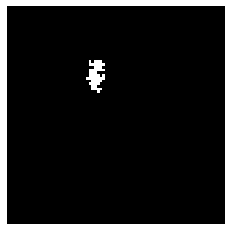

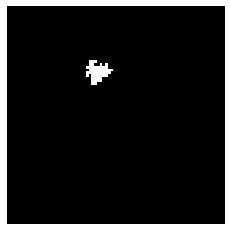

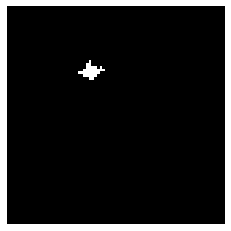

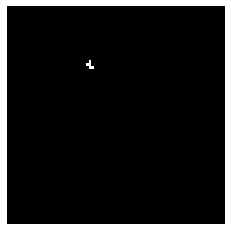

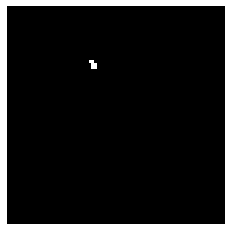

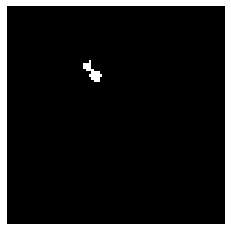

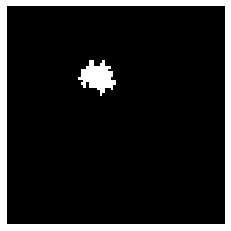

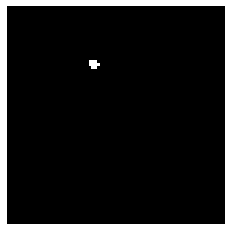

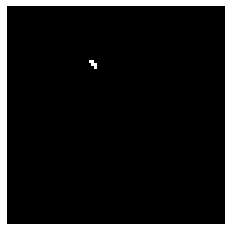

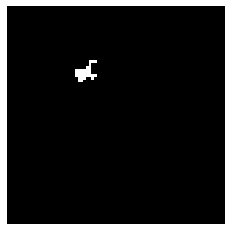

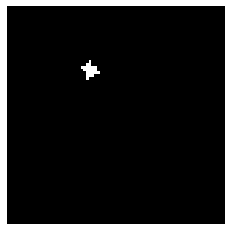

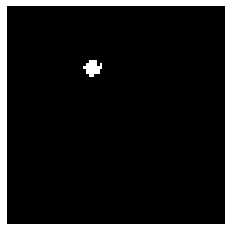

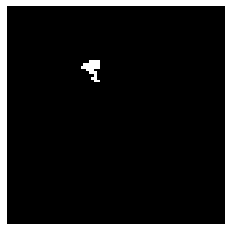

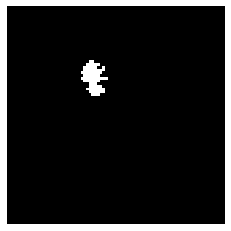

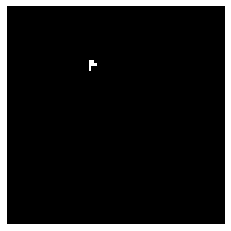

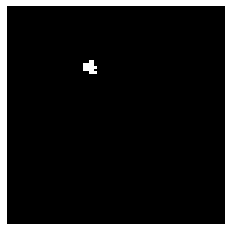

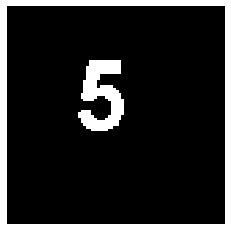

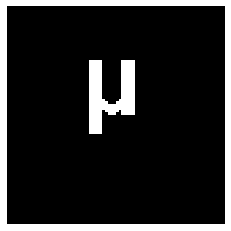

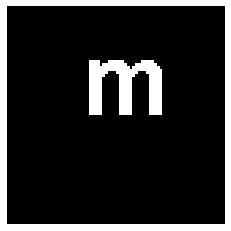

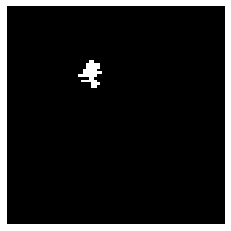

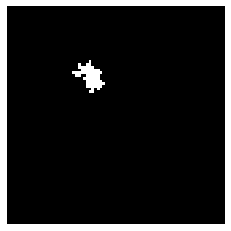

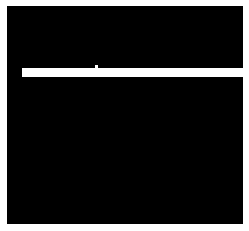

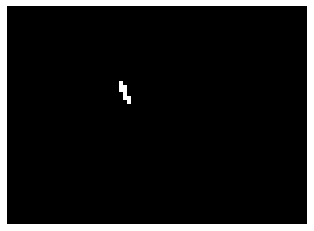

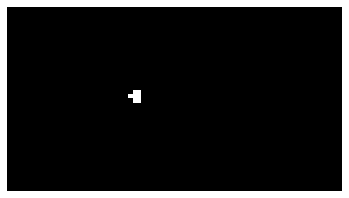

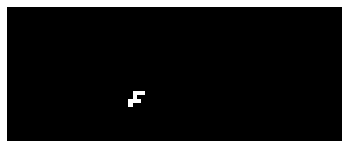

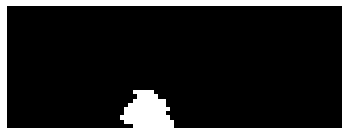

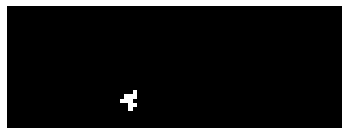

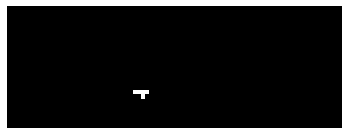

In [4]:
for i in sorted_val:
    seg_map = np.copy(labeled_image_gray)
    x,y=np.where(labeled_image_gray == i)
#    print(x[0],y[0])
    seg_map[labeled_image_gray != i] = 0
    cropped = seg_map[x[0]-20:x[0]+60,y[0]-30:y[0]+50]
    plt.figure()
    plt.axis('off')
    plt.imshow(cropped, cmap=plt.cm.gray)

2035 1429


AttributeError: 'list' object has no attribute 'eccentricity'

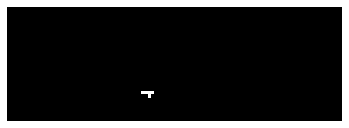

In [6]:
seg_map = np.copy(labeled_image_gray)
scale_bar=len(sorted_val)-1
x,y=np.where(labeled_image_gray == sorted_val[scale_bar])
print(x[0],y[0])
seg_map[labeled_image_gray != sorted_val[scale_bar]] = 0
cropped = seg_map[x[0]-25:x[0]+50,y[0]-40:y[0]+60]
plt.figure()
plt.axis('off')
plt.imshow(cropped, cmap=plt.cm.gray)


from skimage.measure import regionprops
from skimage.measure import label

regions = regionprops(cropped)
regions.eccentricity

2035 1429


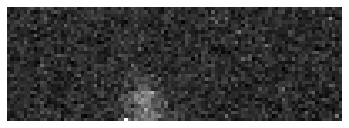

In [10]:
seg_map = np.copy(image_gray)
scale_bar=len(sorted_val)-1
x,y=np.where(labeled_image_gray == sorted_val[scale_bar])
print(x[0],y[0])
#seg_map[labeled_image_gray != sorted_val[scale_bar]] = 0
cropped = seg_map[x[0]-25:x[0]+50,y[0]-40:y[0]+60]
plt.figure()
plt.axis('off')
plt.imshow(cropped, cmap=plt.cm.gray)

0


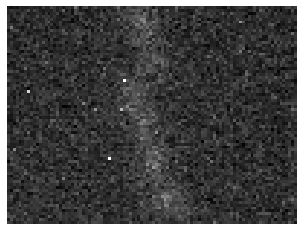

In [15]:
from skimage import data, util
from skimage.measure import label, regionprops
#cropped = util.img_as_ubyte(image_gray) > .4
#label_img = label(cropped, connectivity=img.ndim)
props = regionprops(labeled_image_gray)
c=props[55].eccentricity
print(c)
#cropped = image_gray[int(c)-25:int(c)+50,int(d)-40:int(d)+60]
plt.figure()
plt.axis('off')
plt.imshow(cropped, cmap=plt.cm.gray)

In [4]:
print(labeled_image_gray)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
